In [1]:
import numpy
import pandas
import matplotlib
import sklearn.datasets as sklearn_datasets
import sklearn.preprocessing as sklearn_preprocessing

import IPython.core.debugger as debugger

In [2]:
# show python path
import os
import sys
sys.path

['/Users/shadowlegend/projects/perceptron/notebook',
 '/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python37.zip',
 '/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7',
 '/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload',
 '',
 '/usr/local/lib/python3.7/site-packages',
 '/usr/local/lib/python3.7/site-packages/IPython/extensions',
 '/Users/shadowlegend/.ipython']

In [3]:
# add path to import perceptron module
# this line output ~/projects/perceptron/notebook
main_module_path = os.getcwd().replace('/notebook', '')
sys.path.append(main_module_path)
import perceptron.core as perceptron_core

### Breast Cancer Data

In [4]:
dataset = sklearn_datasets.load_breast_cancer()
data_with_target = numpy.c_[dataset.data, dataset.target]
features_with_target = numpy.append(dataset.feature_names, ['target'])

In [5]:
dataframe = pandas.DataFrame(data=data_with_target, columns=features_with_target)

In [6]:
dataframe.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
564                0.2216          0.2060                  0.07115     0.0  
565                0.1628          0.2572                  0.06637     0.0  
566                0.1418          0.2218                  0.07820     0.0  
567                0.2650          0.4087                  0.12400     0.0  
568                0.0000          0.2871                  0.07039     1.0  

[5 rows x 31 columns]

In [7]:
training_iteration = 10000
learning_rate = 0.01
test_data_len_during_learning = 100

training_data_percentage = 80
training_data_len = int(dataset.data.shape[0] * training_data_percentage / 100)
testing_data_len = dataset.data.shape[0] - training_data_len

### TRAINING

In [8]:
normalized_data = sklearn_preprocessing.minmax_scale(dataset.data)
training_data = normalized_data[:training_data_len]
training_target = dataset.target[:training_data_len]
weights = numpy.random.uniform(low=0.0, high=1.0, size=normalized_data[0].shape[0] + 1)

In [22]:
average_error_records = []
average_testing_error_every_100_iterations = []

# update weights on each sample (x)
# refactor code (x)
# random 100 chuck of data testing every 100 iteration (x)
# false positive accuracy after entire testing set (x)

for i in range(training_iteration):
    total_error_in_one_epoch = 0.0
    
    if i % 100 == 0 and i != 0:
        random_indices = numpy.random.choice(normalized_data.shape[0], test_data_len_during_learning)
        
        test_data = normalized_data[random_indices]
        test_target = dataset.target[random_indices]
        
        total_test_error = 0
        
        for m in range(test_data_len_during_learning):
            predict = perceptron_core.Perceptron(test_data[m], weights)
            
            total_test_error += (test_target[m] - predict.value)**2
        
        average_testing_error_every_100_iterations.append(total_test_error / test_data_len_during_learning)
    
    for n in range(training_data_len):
        predict = perceptron_core.Perceptron(inputs=training_data[n], weights=weights)
        error = training_target[n] - predict.value

        learning_rate_with_error = learning_rate * error * 2
        derivative_of_cost = predict.value * (1 - predict.value)

        weights[0] += learning_rate_with_error * derivative_of_cost
        weights[1:] += learning_rate_with_error * derivative_of_cost * training_data[n]
        
        total_error_in_one_epoch += error**2

    average_error_records.append(total_error_in_one_epoch / training_data_len)

In [10]:
learning_dataframe = pandas.DataFrame(data=numpy.c_[average_error_records], columns=['Average Costs'])
learning_dataframe.index.name = 'Epoch'

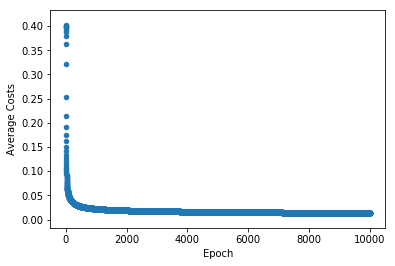

In [12]:
learning_dataframe.reset_index().plot(kind='scatter', x='Epoch', y='Average Costs')

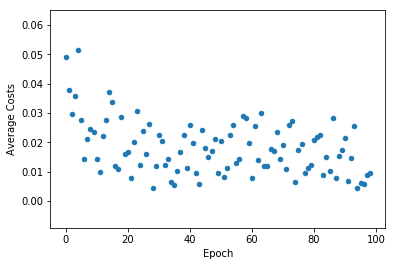

In [13]:
test_during_learning_dataframe = pandas.DataFrame(data=numpy.c_[average_testing_error_every_100_iterations], columns=['Average Costs'])
test_during_learning_dataframe.index.name = 'Epoch'
test_during_learning_dataframe.reset_index().plot(kind='scatter', x='Epoch', y='Average Costs')

In [14]:
test_data = normalized_data[training_data_len:]
predicts = numpy.array([perceptron_core.Perceptron(inputs, weights).value for inputs in test_data])

In [15]:
testing_dataframe = pandas.DataFrame(data=numpy.c_[predicts, dataset.target[training_data_len:]], columns=['Prediction', 'Target'])
testing_dataframe.head(20)

Prediction  Target
0   4.519508e-01     1.0
1   5.911281e-01     1.0
2   8.573640e-01     1.0
3   9.378691e-01     1.0
4   9.961134e-01     1.0
5   1.139043e-06     0.0
6   9.614509e-20     0.0
7   8.684936e-01     1.0
8   9.910305e-01     1.0
9   9.714573e-01     1.0
10  8.385068e-01     1.0
11  6.822825e-01     1.0
12  9.988377e-01     1.0
13  4.001352e-04     0.0
14  7.795382e-01     1.0
15  9.978972e-01     1.0
16  9.158395e-01     1.0
17  9.606588e-01     1.0
18  9.944413e-01     1.0
19  9.997080e-01     1.0

In [16]:
prediction_accuracy = []

acceptable_true_prediction_value = 0.8
acceptable_false_prediction_value = 0.2

for test in testing_dataframe.values:
    predict = test[0]
    target = test[1]
    
    if target == 0.0:
        if predict <= acceptable_false_prediction_value:
            false_alarm = [True, "Negative"]
        elif predict >= acceptable_true_prediction_value:
            false_alarm = [False, "Negative"]
        else:
            false_alarm = [False, "Negative"]
    elif target == 1.0:
        if predict <= acceptable_false_prediction_value:
            false_alarm = [False, "Positive"]
        elif predict >= acceptable_true_prediction_value:
            false_alarm = [True, "Positive"]
        else:
            false_alarm = [False, "Positive"]
    
    prediction_accuracy.append(false_alarm)
        
prediction_accuracy_dataframe = pandas.DataFrame(data=numpy.array(prediction_accuracy), columns=['Prediction', 'Target'])

In [17]:
false_prediction = prediction_accuracy_dataframe['Prediction'] == 'False'
true_prediction = prediction_accuracy_dataframe['Prediction'] == 'True'

positive_target = prediction_accuracy_dataframe['Target'] == 'Positive'
negative_target = prediction_accuracy_dataframe['Target'] == 'Negative'

In [18]:
# False positive count
prediction_accuracy_dataframe[false_prediction & positive_target].shape[0]

10

In [19]:
# False negative count
prediction_accuracy_dataframe[false_prediction & negative_target].shape[0]

1

In [20]:
# True positive count
prediction_accuracy_dataframe[true_prediction & positive_target].shape[0]

78

In [21]:
# True negative count
prediction_accuracy_dataframe[true_prediction & negative_target].shape[0]

25

In [ ]:
# find larger data
# find a library